In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc

# Clustering algos to test
from sklearn.cluster import DBSCAN, MiniBatchKMeans

# NLP Stuff
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# WordClouds
from utils.wordcloud import plot_wordcloud


In [2]:
# Load data
data = pd.read_pickle("../data/tweets_final.pickle")    
hashtags = pd.read_pickle("../data/hashtags.pickle")

In [3]:
# Index of tweets talking about black lives matter
blm_idx = hashtags[hashtags[0] == "BlackLivesMatter"].index.get_level_values(0)

In [4]:
data = data.loc[blm_idx,:]

In [5]:
data.shape

(10575, 108)

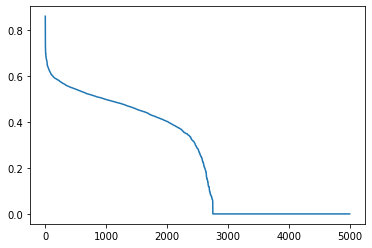

In [8]:
X = data.loc[:,data.columns[-100:]]

# Finding optimal eps based on k-distance graph
from sklearn.neighbors import NearestNeighbors

# Let's take a random subsample

x = X.sample(n =5000).values

ns = 3
nbrs = NearestNeighbors(n_neighbors=ns).fit(x)
distances, indices = nbrs.kneighbors(x)
distanceDec = sorted(distances[:,ns-1], reverse=True)

plt.plot(list(range(1,len(distanceDec)+1)), distanceDec)

In [35]:
# Set up the DBSCAN algorithm
dbscan = DBSCAN(eps =0.6,min_samples= 15,metric ="euclidean",n_jobs=4)

# Fit on our data
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=15, n_jobs=4, p=None)

In [36]:
data["label"] = dbscan.labels_

In [37]:
data.groupby("label").count()

,userid,user_screen_name,user_display_name,follower_count,tweet_text,is_retweet,retweet_count,hashtags,0_dim,1_dim,...,90_dim,91_dim,92_dim,93_dim,94_dim,95_dim,96_dim,97_dim,98_dim,99_dim
label,,,,,,,,,,,,,,,,,,,,,
-1,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
0,10204,10204,10204,10204,10204,10204,10204,10204,10204,10204,...,10204,10204,10204,10204,10204,10204,10204,10204,10204,10204
1,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
3,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
5,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
6,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
7,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [31]:
# Set up tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Set stop words
stop_words = set(stopwords.words('english')) 

In [32]:
def visualize_cluster(cluster, savepath = None):
    
    # Get subset
    subset  = data[data.label == cluster]
    
    # Tokenize, remove stopwords
    tweets_tokenized = [tokenizer.tokenize(t) for t in subset["tweet_text"]]

    # Remove stopwords
    tweets_tokenized_noSwords = np.array([[w for w in tweet_tokens if w not in stop_words] for tweet_tokens in tweets_tokenized])
    
    # Plot Wordcloud
    plot_wordcloud(tweets_tokenized_noSwords,savepath)

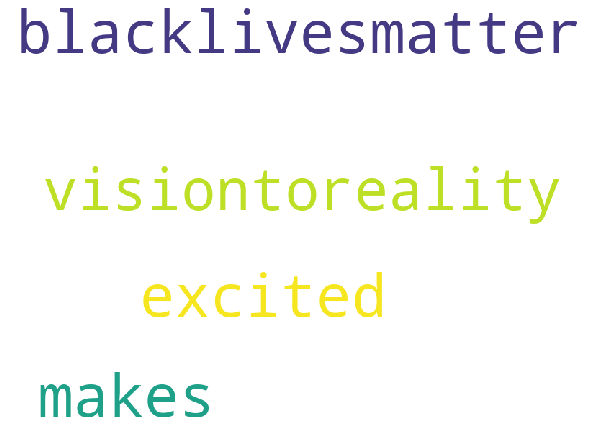

In [39]:
visualize_cluster(7)

Conclusion: There are no distinct groups inside the hashtags / topics. Rather the topics themselves are aimed at beeing polarizing.